In [ ]:
# Python program to detect cycle
# in a graph

# https://www.geeksforgeeks.org/detect-cycle-in-a-graph/

from collections import defaultdict


class Graph():
	def __init__(self, vertices):
		self.graph = defaultdict(list)
		self.V = vertices

	def addEdge(self, u, v):
		self.graph[u].append(v)

	def isCyclicUtil(self, v, visited, recStack):

		# Mark current node as visited and
		# adds to recursion stack
		visited[v] = True
		recStack[v] = True

		# Recur for all neighbours
		# if any neighbour is visited and in
		# recStack then graph is cyclic
		for neighbour in self.graph[v]:
			if visited[neighbour] == False:
				if self.isCyclicUtil(neighbour, visited, recStack) == True:
					return True
			elif recStack[neighbour] == True:
				return True

		# The node needs to be popped from
		# recursion stack before function ends
		recStack[v] = False
		return False

	# Returns true if graph is cyclic else false
	def isCyclic(self):
		visited = [False] * (self.V + 1)
		recStack = [False] * (self.V + 1)
		for node in range(self.V):
			if visited[node] == False:
				if self.isCyclicUtil(node, visited, recStack) == True:
					return True
		return False


# Driver code
if __name__ == '__main__':
	g = Graph(4)
	g.addEdge(0, 1)
	g.addEdge(0, 2)
	g.addEdge(1, 2)
	g.addEdge(2, 0)
	g.addEdge(2, 3)
	g.addEdge(3, 3)

	if g.isCyclic() == 1:
		print("Graph contains cycle")
	else:
		print("Graph doesn't contain cycle")




Graph contains cycle


Graph contains cycle


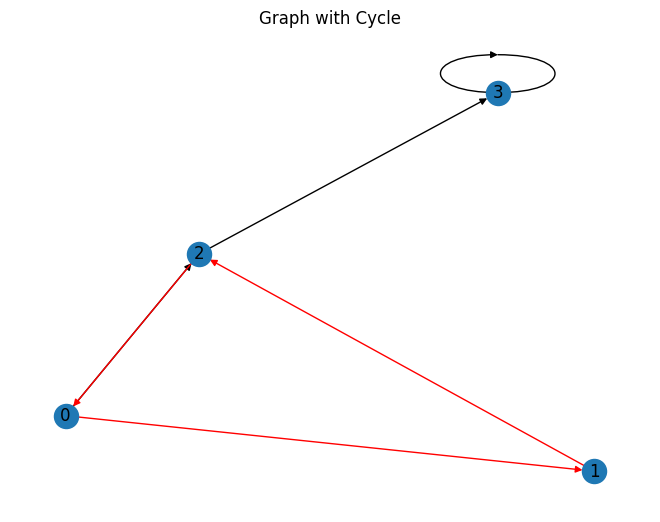

In [ ]:
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt

class Graph():
    def __init__(self, vertices):
        self.graph = defaultdict(list)
        self.V = vertices
        self.has_cycle = False
        self.cycle_edges = []

    def addEdge(self, u, v):
        self.graph[u].append(v)

    def isCyclicUtil(self, v, visited, recStack):
        visited[v] = True
        recStack[v] = True

        for neighbour in self.graph[v]:
            if not visited[neighbour]:
                if self.isCyclicUtil(neighbour, visited, recStack):
                    self.has_cycle = True
                    self.cycle_edges.append((v, neighbour))
                    return True
            elif recStack[neighbour]:
                self.has_cycle = True
                self.cycle_edges.append((v, neighbour))
                return True

        recStack[v] = False
        return False

    def isCyclic(self):
        visited = [False] * (self.V + 1)
        recStack = [False] * (self.V + 1)
        for node in range(self.V):
            if not visited[node]:
                if self.isCyclicUtil(node, visited, recStack):
                    return True
        return False

    def visualize(self):
        G = nx.DiGraph()
        for u in self.graph:
            for v in self.graph[u]:
                if (u, v) in self.cycle_edges:
                    G.add_edge(u, v, color='red')
                else:
                    G.add_edge(u, v, color='black')
        edge_colors = [G[u][v]['color'] for u, v in G.edges()]
        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, arrows=True, edge_color=edge_colors)
        plt.title('Graph with Cycle' if self.has_cycle else 'Graph without Cycle')
        plt.show()

# Driver code
if __name__ == '__main__':
    g = Graph(4)
    g.addEdge(0, 1)
    g.addEdge(0, 2)
    g.addEdge(1, 2)
    g.addEdge(2, 0)
    g.addEdge(2, 3)
    # g.addEdge(2, 1)
    g.addEdge(3, 3)

    if g.isCyclic():
        print("Graph contains cycle")
    else:
        print("Graph doesn't contain cycle")

    g.visualize()
